In [2]:
%pwd

'c:\\Users\\KentoSuemitsu\\Desktop\\study\\mne'

In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt

from telnetlib import NOP
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
import pickle


In [63]:
mat = scipy.io.loadmat('../datasets/Large_EEG_motor_imagery/raw_data/HaLTSubjectB1602186StLRHandLegTongue.mat')

marker = np.array(mat['o']['marker'][0][0])
data = np.array(mat['o']['data'][0][0])

info = mne.create_info(
    ch_names=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2',
    'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'MAR'],
    ch_types=['eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg',
    'eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'stim'],
    sfreq=200
)

data = np.append(data, marker, axis=1)
data = np.transpose(data, (1,0))
# data = np.delete(data, -1, axis=0)
custom_raw = mne.io.RawArray(data, info)
print(custom_raw)

ValueError: len(data) (23) does not match len(info["ch_names"]) (22)

In [66]:


events = mne.find_events(custom_raw)
event_dict = {'left_hand': 1, 'right_hand': 2, 'paccive': 3,
				'left_leg':4, 'tongue':5, 'right_leg':6,
				'first_relax':99, 'rest_session':91, 'finish_experience':92}

963 events found
Event IDs: [ 1  2  3  4  5  6 91 92 99]


In [67]:
reject_criteria = None#dict(eeg=150e-6)

In [68]:
epochs = mne.Epochs(custom_raw, events, event_id=event_dict, tmin=-0.2, tmax=1.0,
                    reject=reject_criteria, preload=True)


                    

Not setting metadata
Not setting metadata
963 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 963 events and 241 original time points ...
0 bad epochs dropped


In [69]:
# fig = mne.viz.plot_events(events, sfreq=custom_raw.info['sfreq'],
#                           first_samp=custom_raw.first_samp, event_id=event_dict)
# fig.subplots_adjust(right=0.7)  

In [70]:
conds_we_care_about = ['left_hand', 'right_hand', 'paccive',
				'left_leg', 'tongue', 'right_leg']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
left_hand_epochs=epochs['left_hand']
right_hand_epochs=epochs['right_hand']	

Dropped 43 epochs: 17, 19, 50, 63, 92, 116, 122, 166, 167, 169, 178, 189, 190, 192, 196, 203, 205, 210, 213, 220, 221, 222, 223, 224, 233, 278, 279, 283, 286, 402, 404, 405, 408, 409, 413, 414, 428, 435, 437, 438, 441, 442, 458


Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_13808\3642423572.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_13808\3642423572.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_13808\3642423572.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])


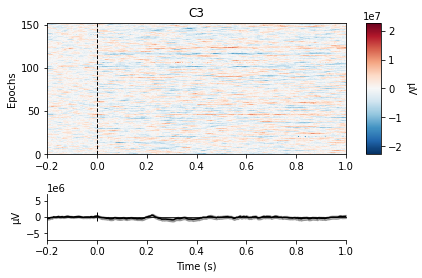

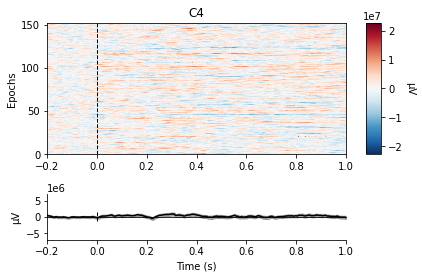

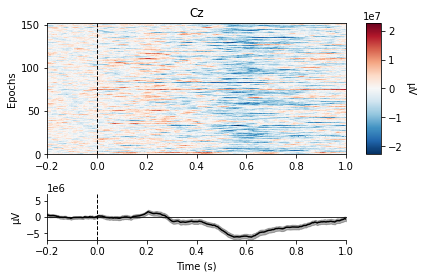

AttributeError: 'Epochs' object has no attribute 'plot_imag'

In [71]:
left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
right_hand_epochs.plot_imag(picks=['C3', 'C4','Cz'])

In [ ]:

left_hand_evoked = epochs['left_hand'].average()
right_hand_evoked = epochs['left_hand'].average()
paccive_evoked=epochs['paccive'].average()
left_leg_evoked=epochs['left_leg'].average()
tongue_evoked=epochs['tongue'].average()
right_leg_evoked=epochs['right_leg'].average()




# mne.viz.plot_compare_evokeds(dict(left_hand=left_hand_evoked, right_hand=right_hand_evoked,
# paccive=paccive_evoked, left_leg=left_leg_evoked,tongue=tongue_evoked, right_leg=right_leg_evoked),
#                              legend='upper left', show_sensors='upper right')

In [72]:
montage = mne.channels.make_standard_montage('standard_1020')
left_hand_evoked.set_montage(montage)

<Evoked | 'left_hand' (average, N=152), -0.2 – 1 sec, baseline -0.2 – 0 sec, 21 ch, ~74 kB>

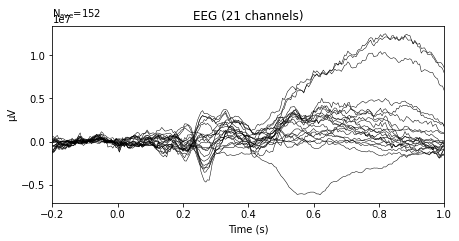

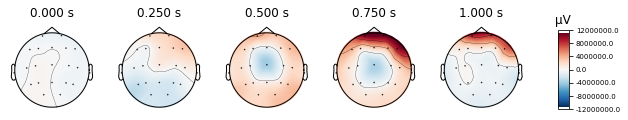

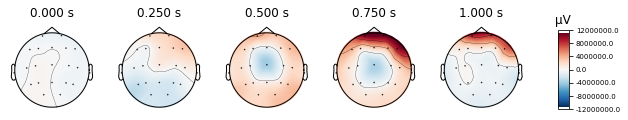

In [74]:
# left_hand_evoked.plot()

# evokeds_list = mne.read_evokeds(custom_raw, baseline=(None, 0),
#                                 proj=True, verbose=False)
# conds = ('left_hand', 'right_hand', 'paccive',
#                 'left_leg', 'tongue', 'right_leg')


# evks = dict(zip(conds, evokeds_list))



times = np.linspace(0.00, 1.0, 5)
left_hand_evoked.plot(exclude=[])
left_hand_evoked.plot_topomap(ch_type='eeg', times=times, colorbar=True)

Using matplotlib as 2D backend.


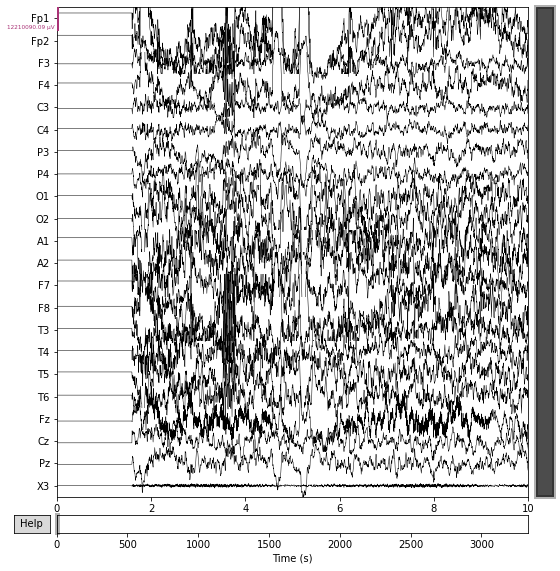

In [17]:
scalings = 'auto'
custom_raw.plot(n_channels=23, 
                scalings=scalings,
                title='Data from arrays',
         show=True, block=True)

plt.show()

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_evk_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis-ave.fif')
print(evokeds_list)
evokeds_list = mne.read_evokeds(sample_data_evk_file, baseline=(None, 0),
                                proj=True, verbose=False)

# Show the condition names, and reassure ourselves that baseline correction has
# been applied.
for e in evokeds_list:
    print(f'Condition: {e.comment}, baseline: {e.baseline}')
conds = ('aud/left', 'aud/right', 'vis/left', 'vis/right')
evks = dict(zip(conds, evokeds_list))

[<Evoked | 'Left Auditory' (average, N=55), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 376 ch, ~4.5 MB>, <Evoked | 'Right Auditory' (average, N=61), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 376 ch, ~4.5 MB>, <Evoked | 'Left visual' (average, N=67), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 376 ch, ~4.5 MB>, <Evoked | 'Right visual' (average, N=58), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 376 ch, ~4.5 MB>]
Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


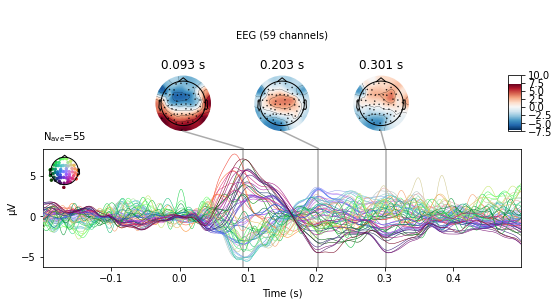

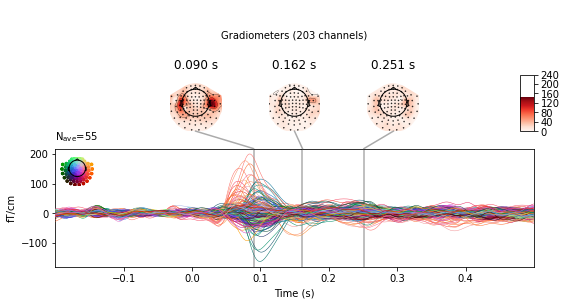

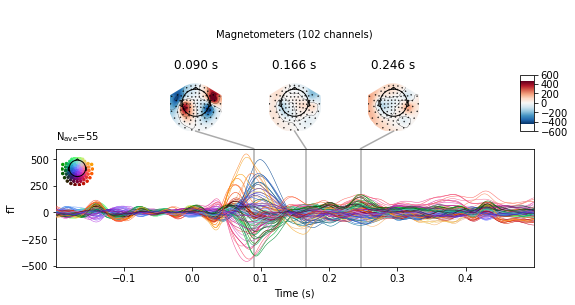

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [ ]:
times = np.linspace(0.05, 0.13, 5)
evks['aud/left'].plot_joint()